# **🇺🇸US 🦠Covid19 EDA**

---

## **🛳 Getting packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **🚚 Loading data**

In [2]:
# Loading the data, parsing the dates & making date column as index column
df = pd.read_csv('../input/us-counties-covid-19-dataset/us-counties.csv', parse_dates=['date'], index_col='date')
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414948 entries, 2020-01-21 to 2020-08-08
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  414948 non-null  object 
 1   state   414948 non-null  object 
 2   fips    410811 non-null  float64
 3   cases   414948 non-null  int64  
 4   deaths  414948 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 19.0+ MB


### **😎 Helper functions**

In [4]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

## **🔬 Analysis on the basis of states**

In [5]:
# Getting uniuqe states from state column 
unique_states = df.state.unique()

print(unique_states)

print()

# Number of unique states
print(f'Number of unique states: {len(unique_states)}')

['Washington' 'Illinois' 'California' 'Arizona' 'Massachusetts'
 'Wisconsin' 'Texas' 'Nebraska' 'Utah' 'Oregon' 'Florida' 'New York'
 'Rhode Island' 'Georgia' 'New Hampshire' 'North Carolina' 'New Jersey'
 'Colorado' 'Maryland' 'Nevada' 'Tennessee' 'Hawaii' 'Indiana' 'Kentucky'
 'Minnesota' 'Oklahoma' 'Pennsylvania' 'South Carolina'
 'District of Columbia' 'Kansas' 'Missouri' 'Vermont' 'Virginia'
 'Connecticut' 'Iowa' 'Louisiana' 'Ohio' 'Michigan' 'South Dakota'
 'Arkansas' 'Delaware' 'Mississippi' 'New Mexico' 'North Dakota' 'Wyoming'
 'Alaska' 'Maine' 'Alabama' 'Idaho' 'Montana' 'Puerto Rico'
 'Virgin Islands' 'Guam' 'West Virginia' 'Northern Mariana Islands']

Number of unique states: 55


In [6]:
# Grouping data on the basis of states
states_group = df.groupby(['state'])

In [7]:
# Iterating through first item in states_group
for state, state_df in states_group:
    print(state)
    print(state_df)
    break

Alabama
                county    state    fips  cases  deaths
date                                                  
2020-03-13      Elmore  Alabama  1051.0      1       0
2020-03-13   Jefferson  Alabama  1073.0      2       0
2020-03-13   Limestone  Alabama  1083.0      1       0
2020-03-13  Montgomery  Alabama  1101.0      1       0
2020-03-13  Tuscaloosa  Alabama  1125.0      1       0
...                ...      ...     ...    ...     ...
2020-08-08  Tuscaloosa  Alabama  1125.0   4316      75
2020-08-08      Walker  Alabama  1127.0   1555      67
2020-08-08  Washington  Alabama  1129.0    393      12
2020-08-08      Wilcox  Alabama  1131.0    442      10
2020-08-08     Winston  Alabama  1133.0    466      11

[9231 rows x 5 columns]


### **🚄 Creating dataframe for states**

In [8]:
# Structure of states_data dictornary
# states_data = {
#     'state_name': {
#         'cases': 'total_num_of_cases',
#         'deaths': 'total_num_of_deaths'
#     }
# }

states_data = {}
for state, state_df in states_group:
    states_data[state] = {
        'cases': state_df.cases.sum(),
        'deaths': state_df.deaths.sum()
    }

In [9]:
states_df = pd.DataFrame(states_data).transpose()
states_df['state'] = states_df.index
states_df.head()

,cases,deaths,state
Alabama,3978827,94085,Alabama
Alaska,145025,1394,Alaska
Arizona,7407855,173588,Arizona
Arkansas,1949348,24870,Arkansas
California,23960673,597315,California


### **📊 Horizontal bar-chart for Cases & Deaths in states**

[Text(0, 0.5, 'States'), Text(0.5, 0, 'Cases & Deaths in states')]

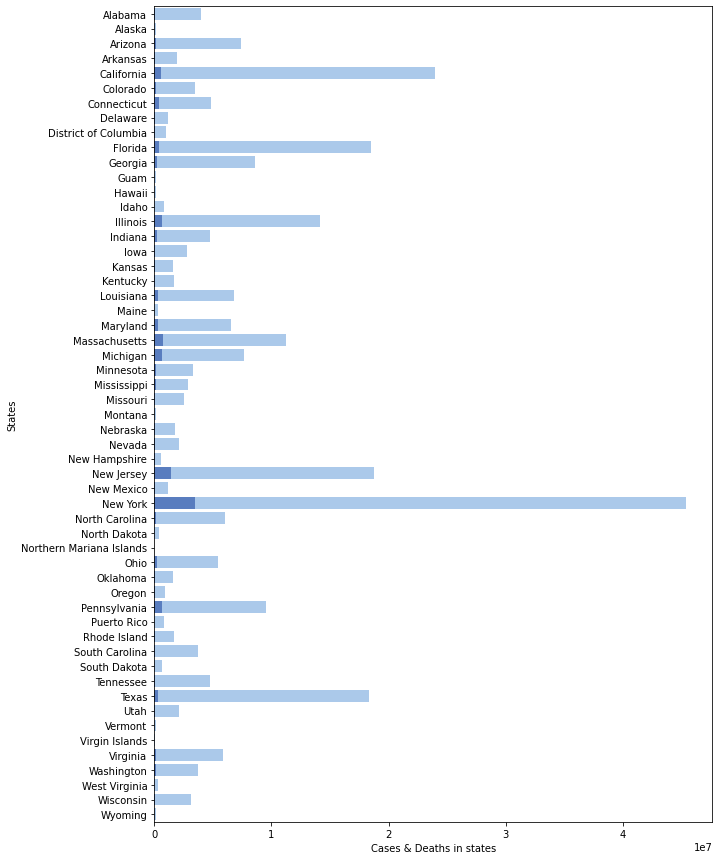

In [10]:
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes("pastel")
sns.barplot(x='cases', y='state', data=states_df, label="Total Cases", color="b")

sns.set_color_codes("muted")
sns.barplot(x='deaths', y='state', data=states_df, label="Total Deaths", color="b")

ax.set(ylabel="States", xlabel="Cases & Deaths in states")

### **📈 Top 5 states on the basis of number of cases**

In [11]:
results = states_df.sort_values('cases', ascending=False).head(5)

print('*** Top 5 states on the basis of number of cases *** \n')
for state in results.index:
    print('-'*20)
    print(f'{state} | {human_format(results.loc[state].cases)}')

*** Top 5 states on the basis of number of cases *** 

--------------------
New York | 45.4M
--------------------
California | 24M
--------------------
New Jersey | 18.8M
--------------------
Florida | 18.5M
--------------------
Texas | 18.4M


### **📉 Bottom 5 states on the basis of number of cases**

In [12]:
results = states_df.sort_values('cases', ascending=True).head(5)

print('*** Bottom 5 states on the basis of number of cases *** \n')
for state in results.index:
    print('-'*20)
    print(f'{state} | {human_format(results.loc[state].cases)}')

*** Bottom 5 states on the basis of number of cases *** 

--------------------
Northern Mariana Islands | 3.28K
--------------------
Virgin Islands | 25.9K
--------------------
Hawaii | 121K
--------------------
Vermont | 138K
--------------------
Guam | 142K


### **📈 Top 5 states on the basis of number of deaths**

In [13]:
results = states_df.sort_values('deaths', ascending=False).head(5)

print('*** Top 5 states on the basis of number of deaths *** \n')
for state in results.index:
    print('-'*20)
    print(f'{state} | {human_format(results.loc[state].deaths)}')

*** Top 5 states on the basis of number of deaths *** 

--------------------
New York | 3.46M
--------------------
New Jersey | 1.41M
--------------------
Massachusetts | 772K
--------------------
Illinois | 646K
--------------------
Michigan | 637K


### **📉 Bottom 5 states on the basis of number of deaths**

In [14]:
results = states_df.sort_values('deaths', ascending=True).head(5)

print('*** Bottom 5 states on the basis of number of deaths *** \n')
for state in results.index:
    print('-'*20)
    print(f'{state} | {human_format(results.loc[state].deaths)}')

*** Bottom 5 states on the basis of number of deaths *** 

--------------------
Northern Mariana Islands | 254
--------------------
Virgin Islands | 669
--------------------
Guam | 767
--------------------
Alaska | 1.39K
--------------------
Wyoming | 1.86K


### **State with maximum cases**

In [15]:
states_df[states_df.cases == states_df.cases.max()]

,cases,deaths,state
New York,45372832,3460233,New York


### **State with maximum deaths**

In [16]:
states_df[states_df.deaths == states_df.deaths.max()]

,cases,deaths,state
New York,45372832,3460233,New York


### **Deaths/Cases Ratio (Combining all states)**

In [17]:
ratio = round(states_df.deaths.sum() / states_df.cases.sum() * 100, 3)
f'Deaths to Cases ratio: {ratio}%'

'Deaths to Cases ratio: 4.533%'

## **📝 Analysis of New York state**

In [18]:
# Getting New York state dataframe from states_group
for state, state_df in states_group:
    if state == 'New York':
        ny_df = pd.DataFrame(state_df)
        
ny_df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0
2020-03-02,New York City,New York,NaN,1,0
2020-03-03,New York City,New York,NaN,2,0
2020-03-04,New York City,New York,NaN,2,0
2020-03-04,Westchester,New York,36119.0,9,0


### **⏳ Doing Time Series Analysis**

In [19]:
# Grouping ny_df on the basis of date
ny_grp_by_dates = ny_df.groupby(['date'])

In [20]:
# Structure of ny_data dictornary
# ny_data = {
#     'date': {
#         'county': 'county_name',
#         'cases': 'total_num_of_cases_on_that_date'
#         'deaths': 'total_num_of_deaths_on_that_date'
#     }
# }

ny_data = {}
for date, date_df in ny_grp_by_dates:
    ny_data[date] = {
        'county': date_df.county.unique()[0],
        'cases': date_df.cases.sum(),
        'deaths': date_df.deaths.sum()
    }

In [21]:
ny_df = pd.DataFrame(ny_data).transpose()
ny_df['date'] = ny_df.index
ny_df.head()

,county,cases,deaths,date
2020-03-01,New York City,1,0,2020-03-01
2020-03-02,New York City,1,0,2020-03-02
2020-03-03,New York City,2,0,2020-03-03
2020-03-04,New York City,11,0,2020-03-04
2020-03-05,Nassau,22,0,2020-03-05


In [22]:
ny_df.tail()

,county,cases,deaths,date
2020-08-04,Albany,422296,32422,2020-08-04
2020-08-05,Albany,422935,32431,2020-08-05
2020-08-06,Albany,423629,32329,2020-08-06
2020-08-07,Albany,424349,32336,2020-08-07
2020-08-08,Albany,425055,32345,2020-08-08


### **🗓 Dates: 01 March 2020 to 08 August 2020**

In [23]:
# Converting cases & deaths dtype to int for plotting charts
ny_df.cases = ny_df.cases.astype(int)
ny_df.deaths = ny_df.deaths.astype(int)

### **Average of weekly cases in New York**

Text(0, 0.5, 'Cases')

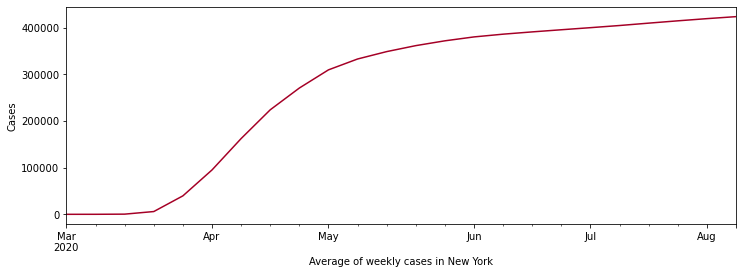

In [24]:
fig = plt.figure(figsize=(12, 4))

# Resampling cases on 'Weekly' frequency & then taking its average
ny_df.cases.resample('W').mean().plot(colormap=plt.cm.RdYlGn, grid=False)
plt.xlabel('Average of weekly cases in New York')
plt.ylabel('Cases')

### **Average of weekly deaths in New York**

Text(0, 0.5, 'Deaths')

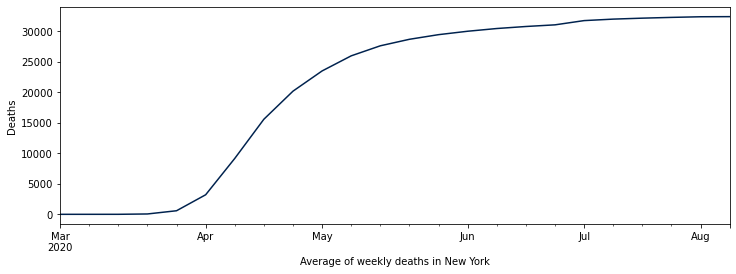

In [25]:
fig = plt.figure(figsize=(12, 4))

# Resampling deaths on 'Weekly' frequency & then taking its average
ny_df.deaths.resample('W').mean().plot(colormap=plt.cm.cividis, grid=False)
plt.xlabel('Average of weekly deaths in New York')
plt.ylabel('Deaths')

### **Deaths/Cases Ratio (in New York)**

In [26]:
ratio = round(ny_df.deaths.sum() / ny_df.cases.sum() * 100, 3)
f'Deaths to Cases ratio: {ratio}%'

'Deaths to Cases ratio: 7.626%'

## **🔭 Analysis on the basis of counties**

In [27]:
# Grouping on the basis of counties
counties_group = df.groupby(['county'])

In [28]:
# Iterating through first item in counties_group
for county, county_df in counties_group:
    print(county)
    print(county_df)
    break

Abbeville
               county           state     fips  cases  deaths
date                                                         
2020-03-19  Abbeville  South Carolina  45001.0      1       0
2020-03-20  Abbeville  South Carolina  45001.0      1       0
2020-03-21  Abbeville  South Carolina  45001.0      1       0
2020-03-22  Abbeville  South Carolina  45001.0      1       0
2020-03-23  Abbeville  South Carolina  45001.0      1       0
...               ...             ...      ...    ...     ...
2020-08-04  Abbeville  South Carolina  45001.0    301       8
2020-08-05  Abbeville  South Carolina  45001.0    304       8
2020-08-06  Abbeville  South Carolina  45001.0    313       8
2020-08-07  Abbeville  South Carolina  45001.0    321       8
2020-08-08  Abbeville  South Carolina  45001.0    325       8

[143 rows x 5 columns]


In [29]:
# Structure of county_data
# county_data = {
#     'county_name': {
#         'cases': 'total_cases_in_that_county',
#         'deaths': 'total_deaths_in_that_county'
#     }
# }

county_data = {}
for county, county_df in counties_group:
    county_data[county] = {
        'cases': county_df.cases.sum(),
        'deaths': county_df.deaths.sum()
    }

In [30]:
counties_df = pd.DataFrame(county_data).transpose()
counties_df['county'] = counties_df.index
counties_df.head()

,cases,deaths,county
Abbeville,12128,126,Abbeville
Acadia,98064,3714,Acadia
Accomack,92334,1277,Accomack
Ada,300058,3210,Ada
Adair,37828,2335,Adair


### **📈 Top 5 counties on the basis of number of cases**

In [31]:
results = counties_df.sort_values('cases', ascending=False).head(5)

print('*** Top 5 counties on the basis of number of cases *** \n')
for county in results.index:
    print('-'*20)
    print(f'{county} | {human_format(results.loc[county].cases)}')

*** Top 5 counties on the basis of number of cases *** 

--------------------
New York City | 25.1M
--------------------
Los Angeles | 9.96M
--------------------
Cook | 8.92M
--------------------
Suffolk | 6.86M
--------------------
Nassau | 4.95M


### **📉 Bottom 5 counties on the basis of number of cases**

In [32]:
results = counties_df.sort_values('cases', ascending=True).head(5)

print('*** Bottom 5 counties on the basis of number of cases *** \n')
for county in results.index:
    print('-'*20)
    print(f'{county} | {human_format(results.loc[county].cases)}')

*** Bottom 5 counties on the basis of number of cases *** 

--------------------
Arthur | 3
--------------------
Powder River | 17
--------------------
Lake of the Woods | 17
--------------------
Dundy | 20
--------------------
Yakutat City and Borough | 24


### **📈 Top 5 counties on the basis of number of deaths**

In [33]:
results = counties_df.sort_values('deaths', ascending=False).head(5)

print('*** Top 5 counties on the basis of number of deaths *** \n')
for county in results.index:
    print('-'*20)
    print(f'{county} | {human_format(results.loc[county].deaths)}')

*** Top 5 counties on the basis of number of deaths *** 

--------------------
New York City | 2.49M
--------------------
Cook | 420K
--------------------
Los Angeles | 319K
--------------------
Middlesex | 318K
--------------------
Suffolk | 311K


### **📉 Bottom 5 counties on the basis of number of deaths**

In [34]:
results = counties_df.sort_values('cases', ascending=True).head(5)

print('*** Bottom 5 counties on the basis of number of deaths *** \n')
for county in results.index:
    print('-'*20)
    print(f'{county} | {human_format(results.loc[county].deaths)}')

*** Bottom 5 counties on the basis of number of deaths *** 

--------------------
Arthur | 0
--------------------
Powder River | 0
--------------------
Lake of the Woods | 0
--------------------
Dundy | 0
--------------------
Yakutat City and Borough | 0


## **📝 Analysis of New York City**

In [35]:
# Getting ny_city_df from counties_group
for county, county_df in counties_group:
    if county == 'New York City':
        ny_city_df = county_df
        
ny_city_df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-01,New York City,New York,NaN,1,0
2020-03-02,New York City,New York,NaN,1,0
2020-03-03,New York City,New York,NaN,2,0
2020-03-04,New York City,New York,NaN,2,0
2020-03-05,New York City,New York,NaN,4,0


In [36]:
ny_city_df.tail()

,county,state,fips,cases,deaths
date,,,,,
2020-08-04,New York City,New York,NaN,230964,23027
2020-08-05,New York City,New York,NaN,231268,23034
2020-08-06,New York City,New York,NaN,231600,23563
2020-08-07,New York City,New York,NaN,231942,23567
2020-08-08,New York City,New York,NaN,232271,23575


### **⏳ Doing Time Series Analysis**

#### **🗓 Dates: 01 March 2020 to 08 August 2020**

### **Average of weekly cases in New York City**

Text(0, 0.5, 'Cases')

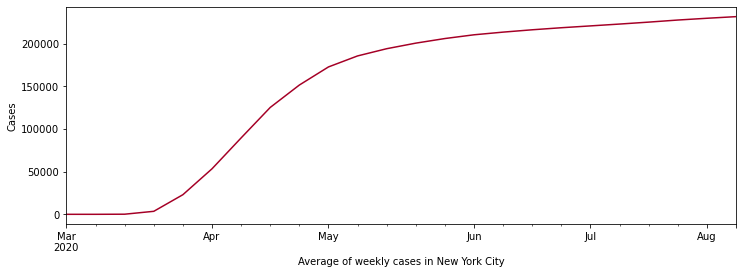

In [37]:
fig = plt.figure(figsize=(12, 4))

# Resampling cases on 'Weekly' frequency & then taking its average
ny_city_df.cases.resample('W').mean().plot(colormap=plt.cm.RdYlGn, grid=False)
plt.xlabel('Average of weekly cases in New York City')
plt.ylabel('Cases')

### **Average of weekly deaths in New York City**

Text(0, 0.5, 'Cases')

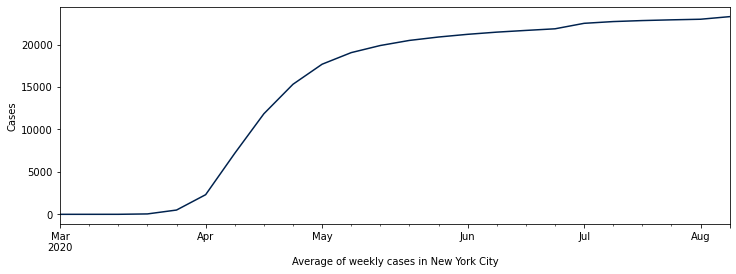

In [38]:
fig = plt.figure(figsize=(12, 4))

# Resampling deaths on 'Weekly' frequency & then taking its average
ny_city_df.deaths.resample('W').mean().plot(colormap=plt.cm.cividis, grid=False)
plt.xlabel('Average of weekly cases in New York City')
plt.ylabel('Cases')

### **Deaths/Cases Ratio (in New York City)**

In [39]:
ratio = round(ny_city_df.deaths.sum() / ny_city_df.cases.sum() * 100, 3)
f'Deaths to Cases ratio: {ratio}%'

'Deaths to Cases ratio: 9.912%'

---